## TBATS 

### Description
- Trignometric Seasonality - Sine and Cosine pattern seasonality 
- Box-Cox transformation - transform dependent variable to normal distribution (bell model)
- AutoRegressive Moving Average - past values and past error lags that help predict the future
- Trend 
- Seasonality 

### Pros
- Seasonality allowed to change overtime
- Automated optimization (trigno and box-cox)
- Easy implementation 

### Cons
- Prediction intervals often wide
- Doesn't allow external regressors
- Slow

In [ ]:
!pip install tbats

## Import libraries and data

In [3]:
# import libraries 
import pandas as pd
import numpy as np 

In [7]:
# get the data 
data  = pd.read_csv("Daily Bike SHaring.csv",
                   index_col = "dteday",
                   parse_dates = True)
data.head(1)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [8]:
# select variables
dataset = data.loc[:, ["cnt", "holiday", "workingday", "weathersit",
                      "temp", "atemp", "hum", "windspeed"]]
dataset.head(1)

,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


## Data Transformation

In [10]:
#renaming dependent variable 
dataset = dataset.rename(columns = {'cnt':'y'})
dataset.head(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


In [11]:
#index 
dataset = dataset.asfreq("D")
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

## Training and Test Set

In [13]:
test_days = 31
training_set = dataset.iloc[:-test_days,:]
test_set = dataset.iloc[-test_days:,:]
test_set.tail(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2012-12-31,2729,0,1,2,0.215833,0.223487,0.5775,0.154846


# TBATS Model

In [15]:
#libraries 
from tbats import TBATS

In [16]:
#tbats model
model = TBATS(use_trend = True, 
             seasonal_periods = [7,365.5])
model = model.fit(training_set['y'])

In [20]:
#predictions
predictions_tbats = pd.Series(model.forecast(steps = len(test_set))).rename("TBATS")
predictions_tbats.index = test_set.index
predictions_tbats.head()

dteday
2012-12-01    4828.272249
2012-12-02    4482.064414
2012-12-03    4362.513961
2012-12-04    4305.123489
2012-12-05    4260.338328
Freq: D, Name: TBATS, dtype: float64

<AxesSubplot:xlabel='dteday'>

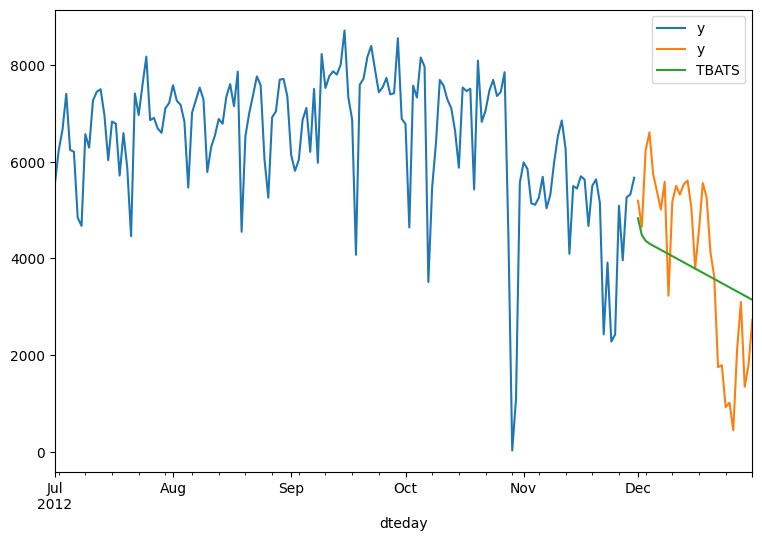

In [21]:
#visualization 
training_set['y']['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
predictions_tbats.plot(legend = True)

## Model Assessment 

In [28]:
#MAE and RMSE 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
print(round(mean_absolute_error(test_set['y'], predictions_tbats),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_tbats)),0))

1299.0
1494.0


In [30]:
#MAPE function
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_tbats)

68.06406403722941

## Export Forecasts

In [39]:
predictions_tbats.to_csv('predictions_tbats.csv', index = True)